# Imports and font/color setup

In [528]:
import random
import os

In [529]:
import pandas as pd, numpy as np, string, re
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.font_manager as fm 
from datetime import timedelta, datetime as dt
import matplotlib.gridspec as gridspec
%matplotlib inline
# %matplotlib notebook

In [530]:
pd.set_option('display.max_columns', 30)

In [531]:
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [532]:
def get_colors(cmap, n, start=0.0, stop=1.0, alpha=1.0, reverse=False):
    import matplotlib.cm as cm, numpy as np 
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [533]:
plt.style.use('fivethirtyeight')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print('\n'.join(color for color in colors)) 

#008fd5
#fc4f30
#e5ae38
#6d904f
#8b8b8b
#810f7c


In [534]:
users = []
scrobbles_file_names = []

user_dict = {}
user_dicts = []

In [535]:
for root, dirs, files in os.walk("../../Datasets/lastfm-20210829/", topdown=True):
    for dir_name in dirs:
        users.append(dir_name)
    for file_name in files:
        scrobbles_file_names.append(file_name)


In [536]:
for user in users:
    for file_name in scrobbles_file_names:
        
        details_dict = {}

        if file_name.split('-')[1] == user and file_name.split('-')[0] == 'scrobbles':
            user_dict[user] = file_name
            details_dict['user'] = user
            details_dict['file_name'] = file_name
            user_dicts.append(details_dict)

In [537]:
user_dict

{'woosteresque': 'scrobbles-woosteresque-1632684543.csv',
 'Twoh3ad3db0y': 'scrobbles-Twoh3ad3db0y-1630228825.csv',
 'Shubhankar0808': 'scrobbles-Shubhankar0808-1632816024.csv',
 'Dracaeryn': 'scrobbles-Dracaeryn-1632773882.csv',
 'SidSaxena': 'scrobbles-SidSaxena-1630171399.csv',
 'voresoph': 'scrobbles-voresoph-1632825524.csv',
 'dhruva93': 'scrobbles-dhruva93-1631895366.csv',
 'sam11235': 'scrobbles-sam11235-1630240335.csv',
 'axaytsg': 'scrobbles-axaytsg-1630249815.csv',
 'Rockgrenade': 'scrobbles-Rockgrenade-1630148679.csv',
 'tarun_verma08': 'scrobbles-tarun_verma08-1624153680.csv'}

In [538]:
user_dicts

[{'user': 'woosteresque',
  'file_name': 'scrobbles-woosteresque-1632684543.csv'},
 {'user': 'Twoh3ad3db0y',
  'file_name': 'scrobbles-Twoh3ad3db0y-1630228825.csv'},
 {'user': 'Shubhankar0808',
  'file_name': 'scrobbles-Shubhankar0808-1632816024.csv'},
 {'user': 'Dracaeryn', 'file_name': 'scrobbles-Dracaeryn-1632773882.csv'},
 {'user': 'SidSaxena', 'file_name': 'scrobbles-SidSaxena-1630171399.csv'},
 {'user': 'voresoph', 'file_name': 'scrobbles-voresoph-1632825524.csv'},
 {'user': 'dhruva93', 'file_name': 'scrobbles-dhruva93-1631895366.csv'},
 {'user': 'sam11235', 'file_name': 'scrobbles-sam11235-1630240335.csv'},
 {'user': 'axaytsg', 'file_name': 'scrobbles-axaytsg-1630249815.csv'},
 {'user': 'Rockgrenade', 'file_name': 'scrobbles-Rockgrenade-1630148679.csv'},
 {'user': 'tarun_verma08',
  'file_name': 'scrobbles-tarun_verma08-1624153680.csv'}]

In [539]:
username = user_dicts[9]['user']
file_name = user_dicts[9]['file_name']

# General top artists/songs analysis

In [540]:
scrobbles = pd.read_csv(f'../../Datasets/lastfm-20210829/{username}/{file_name}')

In [541]:
print(f"{username} Total Scrobbles: {len(scrobbles)}")
print(f"{username} Total Artists: {scrobbles['artist'].nunique()}")

Rockgrenade Total Scrobbles: 47453
Rockgrenade Total Artists: 4312


In [542]:
scrobbles['timestamp'] = pd.to_datetime(scrobbles['utc_time'])
# scrobbles = scrobbles.drop('datetime', axis=1)
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize('UTC')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_convert('Asia/Kolkata')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize(None)

In [543]:
scrobbles['year'] = scrobbles['timestamp'].apply(lambda time: time.year)
scrobbles['month'] = scrobbles['timestamp'].apply(lambda time: time.month)
scrobbles['year-month'] = scrobbles['timestamp'].apply(lambda time: '{}-{:02}'.format(time.year, time.month))
scrobbles['day'] =  scrobbles['timestamp'].apply(lambda time: time.day)
scrobbles['hour'] = scrobbles['timestamp'].apply(lambda time: time.hour)
scrobbles['dow'] = scrobbles['timestamp'].apply(lambda time: time.dayofweek)


# dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# scrobbles['dow'] = scrobbles['dow'].map(dmap)

In [544]:
year_counts = scrobbles['year'].value_counts().sort_index()

In [545]:
year_counts = scrobbles['year'].value_counts().sort_index()
ylim = max(year_counts) + 5000

In [546]:
year_counts

2018     4749
2019    14088
2020    14912
2021    13704
Name: year, dtype: int64

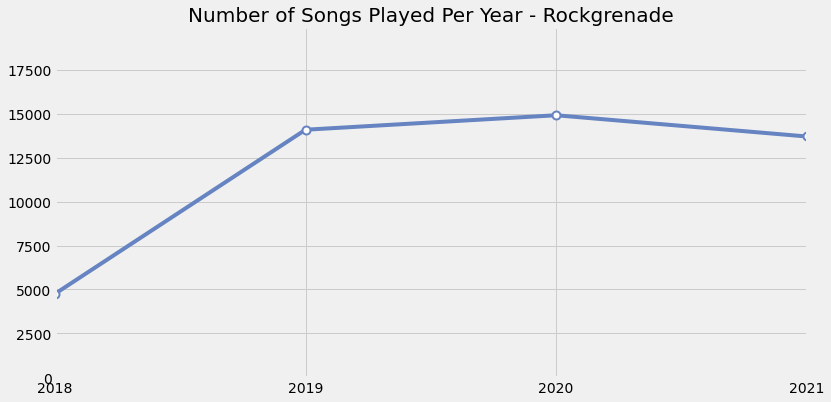

In [547]:
ax = year_counts.plot(kind='line', figsize=(12,6), linewidth=4, alpha=1, marker='o', color='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_ylim(0, ylim)
ax.set_xticks(year_counts.index)
ax.set_ylabel('', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)

ax.set_title(f'Number of Songs Played Per Year - {username}', fontproperties=title_font)

plt.savefig(f'images/{username}/scrobbles-per-year-{username}', dpi=96, bbox_inches='tight')
plt.show()

In [548]:
min_year = min(scrobbles['year'])
max_year = max(scrobbles['year'])
years = scrobbles['year'].unique()[::-1].tolist()

In [549]:
month_counts = scrobbles['month'].value_counts().sort_index()
month_counts

1     2344
2     5263
3     4490
4     3318
5     4731
6     3262
7     3356
8     4966
9     4215
10    5176
11    3795
12    2537
Name: month, dtype: int64

In [550]:
idx = []

for year in years:
    idx.append((scrobbles['month'][scrobbles['year'] == year]).value_counts().sort_index())

In [551]:
month_counts = scrobbles['year-month'].value_counts().sort_index()

date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

In [552]:
ylim = max(month_counts) + 1000

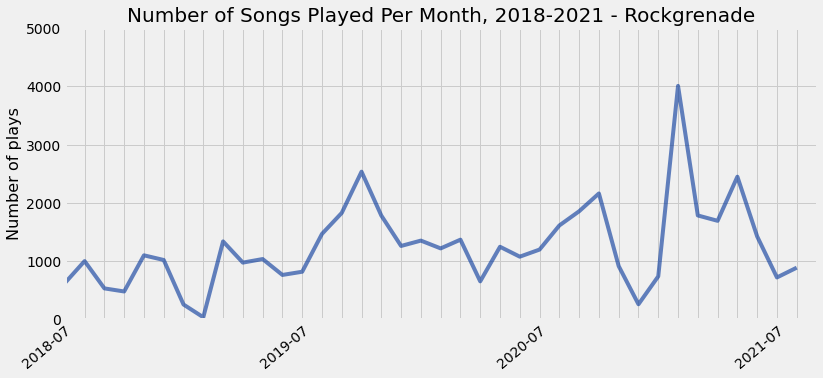

In [553]:
ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(month_counts)))

ax.yaxis.grid(True)
ax.set_ylim((0,ylim))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of Songs Played Per Month, {min_year}-{max_year} - {username}', fontproperties=title_font)

plt.savefig(f'images/{username}/lastfm-scrobbles-per-month-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [554]:
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [555]:
dow_counts
ylim = max(dow_counts) + 2000

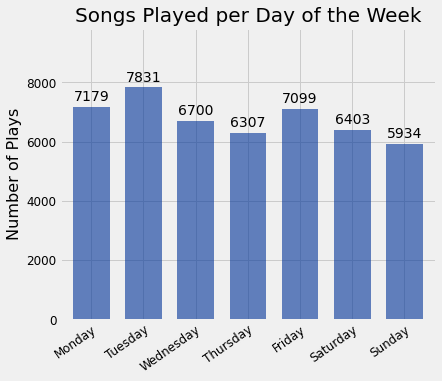

In [556]:
ax = dow_counts.plot(kind='bar', figsize=[6, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_ylim((0, ylim))
ax.set_title('Songs Played per Day of the Week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of Plays', fontproperties=label_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(f'images/{username}/lastfm-scrobbles-per-weekday-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [557]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
ylim = max(hour_counts) + 2000


In [558]:
hour_counts = scrobbles['hour'].value_counts().sort_index()

order = hour_counts.index[6:].tolist() + hour_counts.index[:6].tolist()

ylim = max(hour_counts) + 1000

ordered_hour_counts = hour_counts[order]

In [595]:
import seaborn as sns
sns.set(style="darkgrid")

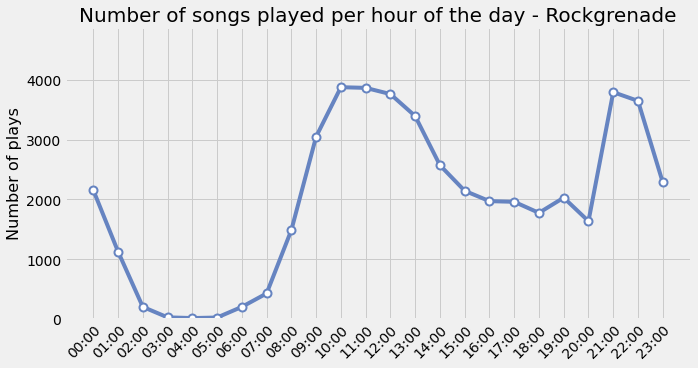

In [559]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0, ylim))

ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of songs played per hour of the day - {username}', fontproperties=title_font)

plt.savefig(f'images/{username}/lastfm-scrobbles-per-hour-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [560]:
day_hour_counts = scrobbles.groupby(['dow', 'hour']).count()['track']
hour_numbers = day_hour_counts.index.levels[1]
day_numbers = day_hour_counts.index.levels[0]
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [561]:
ylim = max(day_hour_counts) + 200

In [562]:
day_numbers

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='dow')

In [563]:
colors = get_colors('nipy_spectral_r', n=len(day_numbers), start=0.1, stop=0.95)

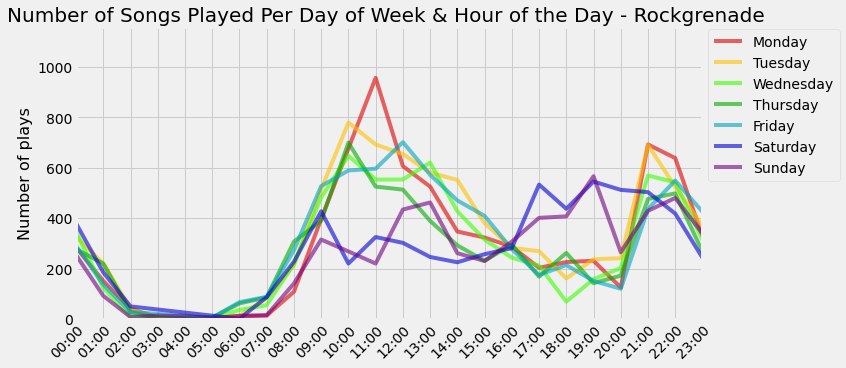

In [564]:
fig, ax = plt.subplots(figsize=[12, 8])
lines = []
for day, c in zip(day_numbers, colors):
    ax = day_hour_counts[day].plot(kind='line', figsize=[10, 5], linewidth=4, alpha=0.6, color=c)
    lines.append(day_names[day])

xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim(hour_numbers[0], hour_numbers[-1])

ax.yaxis.grid(True)

ax.set_ylim([0, ylim])
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of Songs Played Per Day of Week & Hour of the Day - {username} ', fontproperties=title_font)

ax.legend(lines, loc='best', bbox_to_anchor=(1.23,1.017))

plt.savefig(f'images/{username}/lastfm-scrobbles-days-hours-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [565]:
artists = scrobbles['artist'].value_counts()

artists = pd.DataFrame(artists.reset_index().rename(columns={'index': 'artist', 'artist': 'play count'}))

artists.index = [n + 1 for n in artists.index]
artists.head(25)

,artist,play count
1,Troye Sivan,730
2,Arctic Monkeys,708
3,Panic! at the Disco,641
4,Gregory Alan Isakov,433
5,Jeff Tweedy,414
6,Halsey,346
7,Modest Mouse,290
8,Death Cab for Cutie,276
9,John Mayer,263
10,SIE Sound Team,225


In [566]:
tracks = scrobbles.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)

tracks = tracks.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]

tracks.index = [n + 1 for n in tracks.index]

tracks.head(25)

,artist,track,play count
1,Panic! at the Disco,High Hopes,111
2,Iron & Wine,Call It Dreaming,105
3,Sure Sure,This Must Be the Place,92
4,Lorde,Supercut,65
5,Vansire,Nice to See You,63
6,John Mayer,The Age of Worry,62
7,Moby Rich,Yoko Ono,60
8,Led Zeppelin,Immigrant Song - 1990 Remaster,58
9,Panic! at the Disco,This Is Gospel,58
10,khai dreams,Time to Time,57


In [567]:
albums = scrobbles.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums = albums.reset_index().rename(columns={'timestamp': 'play count'})[['artist', 'album', 'play count']]
albums.index = [n+1 for n in albums.index]

In [568]:
albums.head(25)

,artist,album,play count
1,Troye Sivan,Blue Neighbourhood (Deluxe),541
2,Jeff Tweedy,Together At Last,234
3,SIE Sound Team,Dark Cloud Original Soundtrack,225
4,Halsey,Manic,224
5,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",215
6,Panic! at the Disco,Pray for the Wicked,213
7,Hayley Kiyoko,Expectations,176
8,Oh Wonder,Oh Wonder,173
9,Panic! at the Disco,Death of a Bachelor,160
10,Pink Floyd,The Wall,160


In [569]:
month = scrobbles[scrobbles['year-month'].isin(['2017-03'])]

In [570]:
artists_month = month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count


In [571]:
tracks_month = month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(25)

,artist,track,play count


In [572]:
albums_month = month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count


In [573]:
n = 6
plays = scrobbles[scrobbles['artist'].isin(artists_most.head(n).index)]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']

# make sure we have each year represented for each artist, even if they got no plays that year
plays = plays.unstack().T.fillna(method='ffill').T.stack()
top_artists = plays.index.levels[0]

NameError: name 'artists_most' is not defined

In [ ]:
colors = get_colors('Dark2', n)

In [ ]:
fig, ax = plt.subplots(figsize=[8, 6])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
    lines.append(artist)
    
ax.set_xlim((plays.index.get_level_values(1).min(), plays.index.get_level_values(1).max()))

ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.33, 1.016))

plt.savefig('images/lastfm-scrobbles-top-artists-years.png', dpi=96, bbox_inches='tight')
plt.show()

In [ ]:
artists_clean = scrobbles['artist'].str.replace('The ','').str.replace('A ', '')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.ascii_uppercase]]

In [ ]:
ax = first_letters.plot(kind='bar', figsize=[10,6], width = 0.8, alpha=0.6, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)

ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-first-letter-count.png', dpi=96, bbox_inches='tight')

plt.show()

In [ ]:
n = 50
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:n+1].reindex(range(n+1), fill_value=0)

In [ ]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066', zorder=2)

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)
ax.set_xlim((0,n))

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-name-length.png', dpi=96, bbox_inches='tight')
plt.show()